## Final Project
#### Data 620, Spring 2019
###### Team 1: Jason Givens-Doyle, Mehdi Khan, Paul Britton

Video link:https://youtu.be/K0gM5U7DSbg

#### Introduction:
The use of social media, especially tweeting, became a common mode of communications (or attempted communications) in local governments to connect to their citizens. Therefore, twitter data has the potential to provide an extraordinary opportunity to reexamine citizens’ perceptions about their governments. Additionally, it can also provide an unique opportunity to explore citizens reactions to government actions and/or their support or opposition to social issues or events that involve their governments or elected officials. Text Mining techniques such as Natural Language Processing and Social networking may be applied to twitter data to gain such insights. 

#### Project Goal:
This project aims at collecting recent twitter data using the official twitter accounts of certain local governments. The data would include tweets that are replies to government tweets or have mentioned government in their messages. The followers of the government accounts and/or twitter users who mentioned or replied to government accounts would also be identified. All of these would then be used to find answers through Natural Language Processing (NLP) and Social Networking Analysis for the following questions:

•	If tweeting is an effective means of government communications 

•	What are the major types of events, actions and policies that generate the most replies and/or re-tweets from the citizens?

•	If an effective network exists between the followers (citizens) and/or between the followers and the governments and if such networks provide useful insights on government-citizen relationships.

•	If positive or negative events generate more citizen participations (through sentiment analysis)

•	If citizens in certain jurisdictions are happier than the others and if there are any specific reasons for it.   


#### Project Scope and limitations:
A total of eighteen counties in Maryland were studied, because of the lack of enough tweeter data in some counties and the limitation of collecting data through tweeter API, some counties needed to be removed from some analysis and/or visualizations. 

### Project Details:
The Project was divided into three phases - data collection. data clean up and analysis. All data were collected using 'tweepy' library in python and data were stored in a GitHub repository, which was accessed during data clean up and analysis. 

###### Load the libraries:

In [125]:
import networkx as nx
import json
import tweepy
from tweepy import OAuthHandler
import pandas as pd
from pathlib import Path
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.util import ngrams
from wordcloud import WordCloud, ImageColorGenerator

import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob 

#### Data Collection:

In order to collect data from twitter, specific credentials were needed which were saved in json file for privacy. The json file was accessed during accessing data from official twitter site.

In [126]:
credentials = {}

credentials["consumer_key"] = 'my key'
credentials["consumer_secret"] = 'my secret'
credentials["access_token"] = 'my token'
credentials["access_secret"] = 'my access secret'

with open("twitter_credentials.json", "w") as file:  
    json.dump(credentials, file)

A data frame was created to include County names and their corresponding twitter accounts:

In [127]:
govts = [['Cecil County','@CecilCoGov'],["St. Mary's County","@StMarysCoGov"],
	["Anne Arundel County","@AACountyGovt"],
	["Charles County","@CharlesCoMD"],
	["Caroline County","@CarolineMDgov"],
	["Washington County","@WashingtonCoMD"],
	["Garrett County","@GCCommissioners"],
	["Howard County","@HoCoGov"],
	["Queen Anne's County","@QACGOV"],
	["Carroll County","@CarrollCoMD"],
	["Harford County","@HarfordCountyMD"],
	["Frederick County","@FrederickCoMD"],
	["Baltimore County","@BaltCoGov"],
	["Worcester County","@WorcesterCounty"],
	["Prince Georges County","@PrinceGeorgesMD"],
	["Montgomery County","@MontgomeryCoMD"],
 	["Allegany County","@alleganycounty"],  
	["Dorchester County","@dorchester_md"]]

govtAccount = pd.DataFrame(govts, columns=["County","screen_name"])

In [128]:
govtAccount

,County,screen_name
0,Cecil County,@CecilCoGov
1,St. Mary's County,@StMarysCoGov
2,Anne Arundel County,@AACountyGovt
3,Charles County,@CharlesCoMD
4,Caroline County,@CarolineMDgov
5,Washington County,@WashingtonCoMD
6,Garrett County,@GCCommissioners
7,Howard County,@HoCoGov
8,Queen Anne's County,@QACGOV
9,Carroll County,@CarrollCoMD


The following codes were used to access twitter data (currently commented out)

In [129]:
# data_source = Path("C:/Final_project/")

# with open(data_source/"twitter_credentials.json", "r") as file:  
#   tweet_credential = json.load(file)

# auth = OAuthHandler(tweet_credential["consumer_key"], tweet_credential["consumer_secret"])
# auth.set_access_token(tweet_credential["access_token"],tweet_credential["access_secret"])



# api = tweepy.API(auth)



Since each government has several sub-accounts representing individual departments or program etc., those sub-accounts were collected (whichever were available online):

In [130]:
aacountySubaccounts = ['@AACountyGovt','@AACountySchools','@AACPSAthletics','@AACoDPW','@AACOSHERIFF','@AACOPD','@RecParks','@AACO_DOAD']
CecilSubaccounts = ['@CecilCoGov', '@CecilSheriff','@CecilCoHealth','@CecilCountyDES', '@CCPSMD']
StMarysSubaccounts = ['@StMarysCoGov','@SMCPS_MD','@firstsheriff','@SMCHD_gov','@stmemerg']
CharlesSubaccounts = ['@CharlesCoMD','@CCPS','@CCSOMD','@CCDH_Maryland','@CharlesParksRec']
CarolineSubaccounts =['@CarolineMDgov','@CarolineCoPS','@CarolineMDDES','@carolinesheriff']
WashingtonCoSubaccounts =['@WashingtonCoMD','@wcpsmd','@WashCoSheriffMD']
GarnetSubaccounts = ['@GCCommissioners','@GCMDEconDev','@GCPSHappenings','@garretthealth']
howardSubaccounts = ['@HoCoGov', '@HCPDNews','@HoCoRec','@HCDFRS','@HCPSS','@HowardCountyMD']
qweenAnnsSubaccounts = ['@QACGOV','@QueenAnneEM','@QAsheriff','@QACPSMD', '@QACDOH']
CarrollSubaccounts = ['@CarrollCoMD','@CarrollEconDev', '@CCSheriffMD','@CCPSk12','@CMC_Carroll_MD']
HarfordSubaccounts = ['@HarfordCountyMD','@Harford_Sheriff','@HarforCoFireEMS','@HCPSchools']
FrederickSubaccounts = ['@FrederickCoMD','@FCPSMaryland','@FredCoSheriff','@FCDFRS','@FCG_DEM']
BaltimoreSubaccounts = ['@BaltCoGov','@BaltCoPS','@BaltCoEmergency','@BaltCoPolice','@BaltCoFire']
WorcesterSubaccounts = ['@WorcesterCounty','@WorCOSO','@WorcesterSystem','@WorcesterHealth']
PZSubaccounts = ['@PrinceGeorgesMD', '@pgcps','@PGCDSS','@PGSheriff_PIO','@PGCHealth','@PGCountyOEM']
MontgomerySubaccounts = ['@MontgomeryCoMD','@MCPS','@mcpnews']#,'@MoCoDHHS','@ReadyMontgomery','@mcfrs']
alleganySubaccounts = ['@alleganycounty','@AlleganyHlthMD','@ACPSchools','@AlleghenyCoPD','@AlleganyCoDES']
dorchesterSubaccounts = ['@dorchester_md']

allsubaccounts = [aacountySubaccounts,CecilSubaccounts,StMarysSubaccounts,
                  CharlesSubaccounts,CarolineSubaccounts,WashingtonCoSubaccounts,
                  GarnetSubaccounts,howardSubaccounts,qweenAnnsSubaccounts,CarrollSubaccounts,
                  HarfordSubaccounts,FrederickSubaccounts,BaltimoreSubaccounts,WorcesterSubaccounts,
                  PZSubaccounts ,MontgomerySubaccounts,alleganySubaccounts,#dorchesterSubaccounts
                  ]

A function was created to collect tweets for each of the government entities: 

In [131]:
def findTweets(countySubaccounts):
    texts = []
    sname =[]
    name=[]
    loc = []
    
    for account in countySubaccounts:
        for status in tweepy.Cursor(api.search, q=account,result_type='recent',timeout=999999).items(1000):
            texts.append(status.text)
            sname.append(status.user.screen_name)
            name.append(status.user.name)
            loc.append(status.user.location)
    filename = countySubaccounts[0][1:]+"tweets.json"
    mentionedtweets = {'tweets':texts,'screenNames': sname,'userNames':sname,'userlocation':loc }
    with open(data_source/filename, "w") as file:  
        json.dump(mentionedtweets, file)
    #len(mentionedtweets)
    return None

The function was executed using sub-accounts as parameters, tweets were loaded and stored in json format, which then uploaded to GitHub. The following codes were used (currently commented out):

In [132]:
#findTweets(CecilSubaccounts)
#findTweets(aacountySubaccounts)
#findTweets(StMarysSubaccounts)
#findTweets(CharlesSubaccounts)
#findTweets(CarolineSubaccounts)
#findTweets(WashingtonCoSubaccounts)
#findTweets(GarnetSubaccounts)
#findTweets(howardSubaccounts)
#findTweets(howardSubaccounts)
#findTweets(qweenAnnsSubaccounts)
#findTweets(CarrollSubaccounts)
#findTweets(HarfordSubaccounts)
#findTweets(FrederickSubaccounts)
#findTweets(BaltimoreSubaccounts)
#findTweets(WorcesterSubaccounts)
#findTweets(PZSubaccounts)
#findTweets(MontgomerySubaccounts)
#findTweets(alleganySubaccounts)
#findTweets(dorchesterSubaccounts)

All the tweets were collected from the GitHub and a DataFrame was created that represents the tweets and other relevant information:

In [133]:
url = 'https://raw.githubusercontent.com/kmehdi2017/web-analytics/master/Final_project/data/' 
def get_alltweets(allSubaccounts): 
    countyDF = pd.DataFrame()
    for subaccounts in allSubaccounts:
        filename = subaccounts[0][1:]+"tweets.json"
        df = pd.read_json(url+filename,orient='columns')
        df.loc[:,'govt'] = subaccounts[0][1:]
        countyDF = pd.concat([ countyDF,df])
    return countyDF

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 6)
pd.set_option('display.width', 100)

alldata = get_alltweets(allsubaccounts)

Only the original tweets were kept by removing the retweeted tweets:

In [134]:
all_original_tweets = alldata[alldata.tweets.str[:2] !='RT'].copy()
all_original_tweets.head(5)

,tweets,screenNames,userNames,userlocation,govt
0,This week we helped @severnapchamber celebrate...,AAEDC,AAEDC,"Annapolis, MD",AACountyGovt
3,Kudos to @AAHealth Dental Hygienist Jill Dorse...,AAHealth,AAHealth,"Anne Arundel County, Maryland",AACountyGovt
5,Do Maryland public policy bureaucrats know thi...,Joshmazer2018,Joshmazer2018,"Maryland, USA",AACountyGovt
6,I dunno- is cell mediated immunity impaired fo...,Joshmazer2018,Joshmazer2018,"Maryland, USA",AACountyGovt
7,@AACountyGovt Hi! I am a resident of AA and ha...,BelleAvocat,BelleAvocat,"Maryland, USA",AACountyGovt


Since government tweets accounts were also mentioned in tweets originated by the governments themselves, those tweets were also removed so that only non-government tweets were represented in the dataset:

In [135]:
govt_names = all_original_tweets["govt"].unique()
all_original_tweets = all_original_tweets.drop(all_original_tweets.loc[all_original_tweets.screenNames.isin( govt_names)].index)

#### Pre-processing and clean up:

Since tweets are composed of sveral unusal characters and symbols, the first step for NLP with twitter data
required removing those symbols. The data was then further cleaned up following other data clean up steps typical to any NLP analysis. a function found online (https://gist.github.com/ravikiranj/2639031) was used with some modifications to clean up the data:


In [136]:
def textprocess(texts):
     # convert text to lower-case
    texts = texts.lower()
    # remove URLs
    texts = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', "", texts) 
    # remove usernames
    texts = re.sub('@[^\s]+', "", texts) 
    # remove the # in #hashtag
    texts = re.sub(r'#([^\s]+)', r'\1', texts) 

    return texts

all_original_tweets['tweets'] = all_original_tweets.tweets.apply(textprocess)

all_original_tweets.head(5)

,tweets,screenNames,userNames,userlocation,govt
31,thanks to all celebrating with us at our healt...,AnneArundelCC,AnneArundelCC,"Arnold, MD",AACountyGovt
36,this has been put out for bulk pickup for 2 c...,KunzelMK,KunzelMK,"Washington, DC",AACountyGovt
37,many departments in the are hiring! checkout ...,AACOPD,AACOPD,Anne Arundel County Maryland,AACountyGovt
40,i’m convinced the trash collectors intentiona...,WhatAnnoysMe,WhatAnnoysMe,"Annapolis area, MD",AACountyGovt
41,get the facts 👉\n,Joshmazer2018,Joshmazer2018,"Maryland, USA",AACountyGovt


The common words such as 'the', 'a', 'are' etc. that are not useful but occur frequently were also removed using stopwards from nltk package: 

In [137]:
tokenizer = RegexpTokenizer(r'\w+')
def remove_stopwords(txt):
    txt = tokenizer.tokenize(txt)
    removed = [word for word in txt if word.lower() not in stopwords.words('english')] 
    return removed
all_original_tweets['tweets'] = all_original_tweets.tweets.apply(remove_stopwords)
all_original_tweets.head(5)
#all_tweet_text = all_tweet_text.apply(remove_stopwords)
all_original_tweets['tweets'] = [" ".join(tweet) for tweet in all_original_tweets['tweets'].values]

Final cleaned up twitter texts:

In [138]:
all_original_tweets.head(5)

,tweets,screenNames,userNames,userlocation,govt
31,thanks celebrating us health amp life sciences...,AnneArundelCC,AnneArundelCC,"Arnold, MD",AACountyGovt
36,put bulk pickup 2 collection days amp everyday...,KunzelMK,KunzelMK,"Washington, DC",AACountyGovt
37,many departments hiring checkout county websit...,AACOPD,AACOPD,Anne Arundel County Maryland,AACountyGovt
40,convinced trash collectors intentionally leave...,WhatAnnoysMe,WhatAnnoysMe,"Annapolis area, MD",AACountyGovt
41,get facts,Joshmazer2018,Joshmazer2018,"Maryland, USA",AACountyGovt


## NLP Analysis:

#### Data Visualizations with WordCloud:

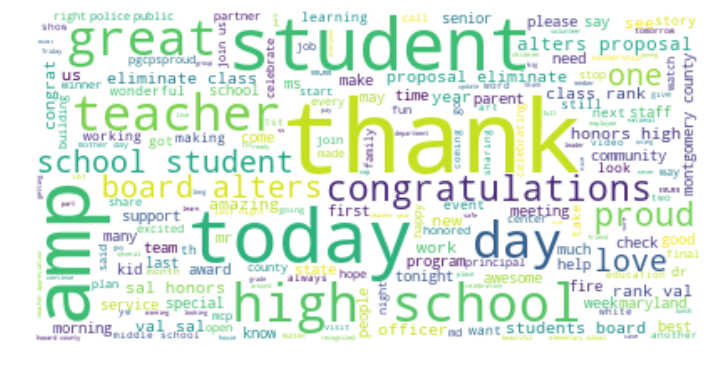

In [139]:
all_tweet_text = " ".join(tweet for tweet in all_original_tweets.tweets)
wordcloud = WordCloud(max_font_size=60, background_color="white").generate(all_tweet_text)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

As per the above image (word cloud), the most used words in the entire tweets were somewhat positive (such as 'Thank', 'great', 'congratulations' etc.) or neutral. It was also observed that many frequent words were school or education related suggesting that citizens were more concerned about school or education related activities or events in the Counties. 

#### Most frequent words:
To double check the above findings, most frequent words were examined to see whether they agree with word cloud:

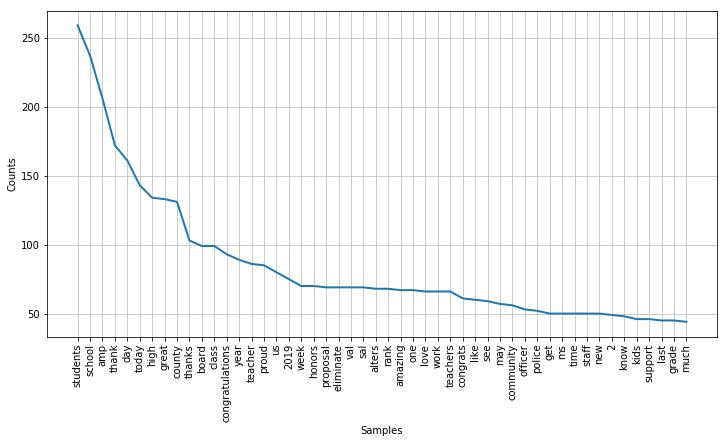

In [140]:
tweet_text = tokenizer.tokenize(all_tweet_text)
freqdist = nltk.FreqDist(tweet_text)
plt.figure(figsize=(12,6))
freqdist.plot(50)

The above figure shows 50 most frequent words in the tweet dataset. Again, as depicted in the word cloud, the visualization of the most frequent words also suggests mostly neutral, some positive and school/education related conversations in the tweets.

#### Most frequent n-grams:

n-grams represnt the combination of words and their frequencies in the Corpus, sometimes a combination of words make sense instead of a single word. A bi-gram (combination of two words) was created and visualized with the twitter data to examine if it provide any new insights:

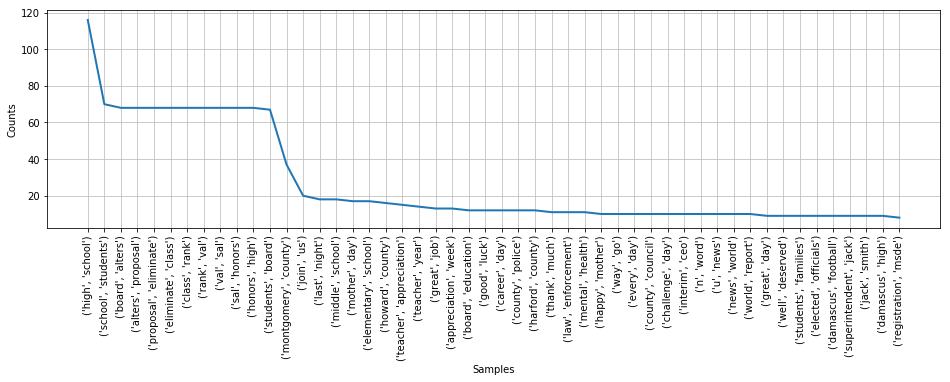

In [141]:
fdist = nltk.FreqDist(ngrams(tweet_text,2))
plt.figure(figsize=(16,4))
fdist.plot(50)

The bi-gram visualization also provide similar information as the eariler visualizations

### Sentiment Analysis:
As the next step a sentiment analysis was done to see if the tweets indeed represnted some emotional states of the citizens. There can be two approaches to sentiment analysis:
1. Lexicon-based methods
2. Machine Learning-based methods.

The Lexicon-based analysis was used for the snetiment analysis. The lexicon based approach is based on the assumption that the contextual sentiment orientation is the sum of the sentiment orientation of each word or phrase. In this approach  a list of positive and negative words are defined, with a valence (for example ‘excellent’: +2, ‘good’: +1, ‘horrible’: -1.5 etc). The algorithm looks up a text to find all known words and then combines their individual results by summing or averaging. TextBlob library was used to do the analysisL

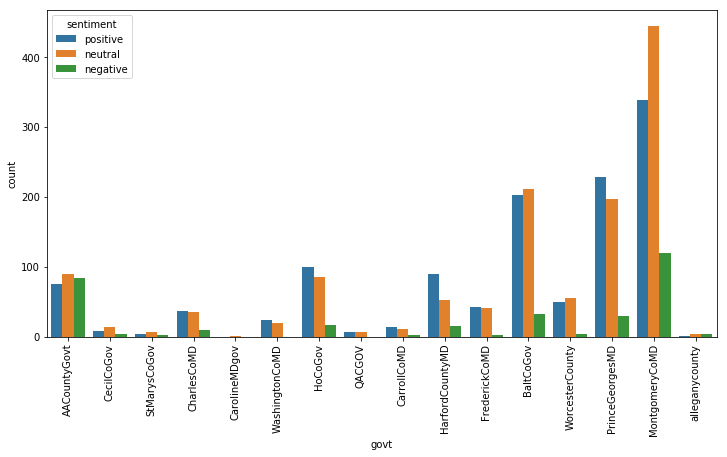

In [142]:
tweetsDF = all_original_tweets[['tweets','govt']]
tweetsDF = tweetsDF.reset_index(drop=True)
tweetsDF["sentiment"] = ""
for i in range(0,tweetsDF.shape[0]):
    emotion = TextBlob(tweetsDF['tweets'].loc[i])
    if emotion.sentiment.polarity >0:
        tweetsDF['sentiment'].loc[i] ='positive'
    if emotion.sentiment.polarity == 0:
        tweetsDF['sentiment'].loc[i] ='neutral' 
    if emotion.sentiment.polarity < 0:
        tweetsDF['sentiment'].loc[i] = 'negative'
    
#tweetsDF.loc[tweetsDF.govt =='AACountyGovt', 'sentiment'].value_counts().plot(kind='bar')  
plt.figure(figsize=(12,6))
plt.xticks(rotation='vertical')
sns.countplot(x="govt",  hue="sentiment",  data=tweetsDF)

The above plot depicts that the neutral or postive messages dominated the citizen tweets. However, Anne Arundel County is an exception where citizens seem to be angrier than the others and tweets had higher negative emotions compared to the number of positive ones. The other exception is Howard County where positive messages were more frequent than the neutral and negatives, so at least according to these tweet dataset Howard County has the happiest citizens. 

### Social Network Analysis (SNA):

Network graph was created with the tweet dataset with the governments and twitter users as nodes. The graph was then analyzed to examine citizen-government interactions and relations:

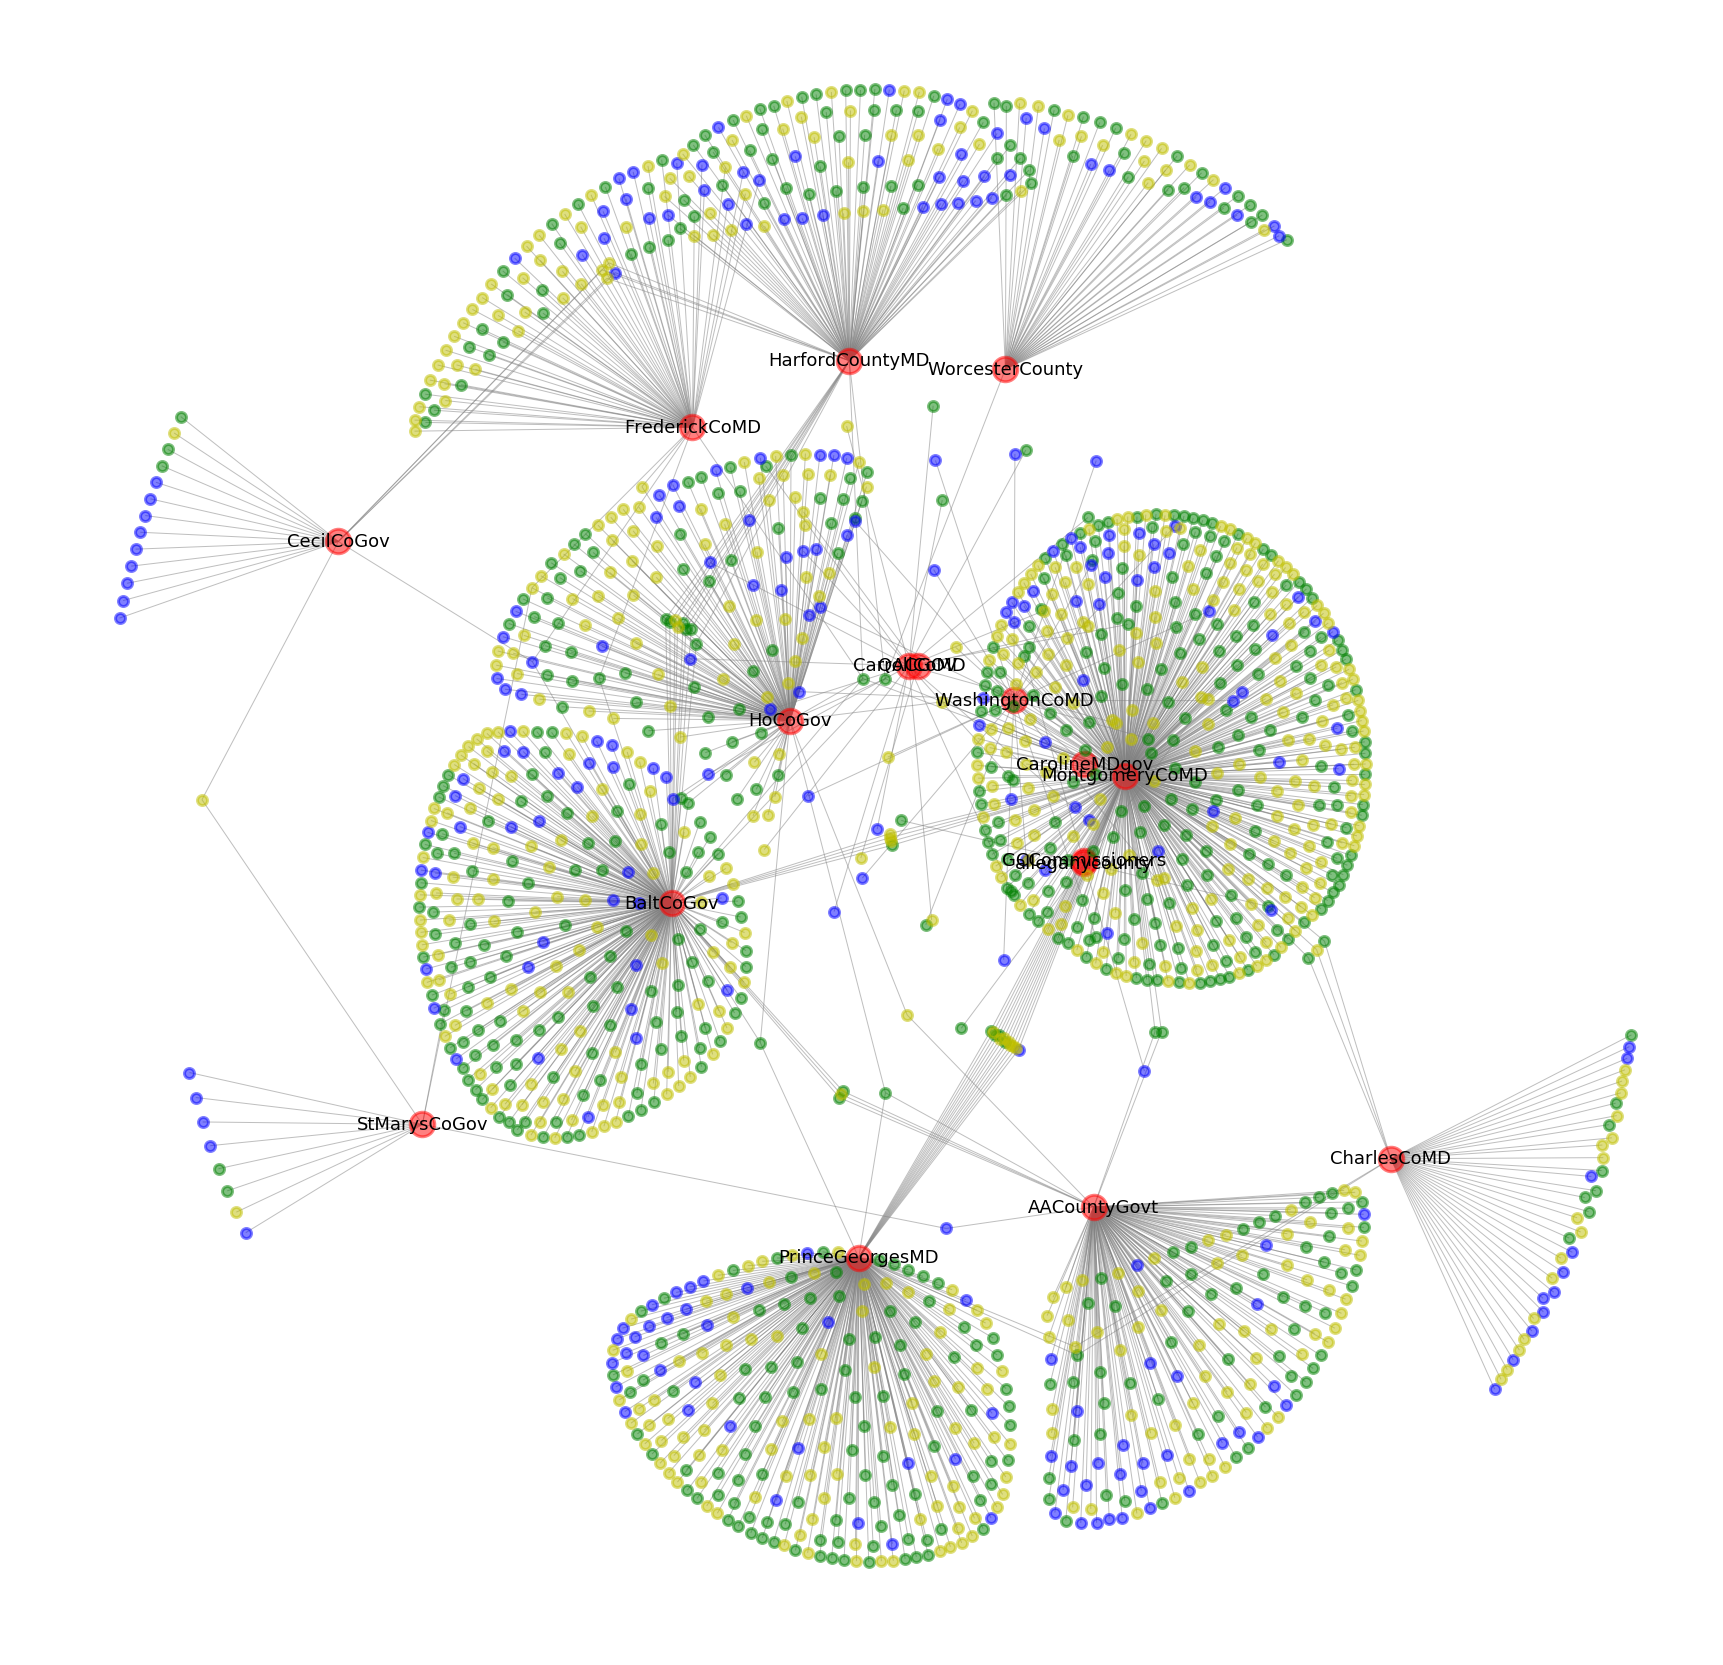

In [143]:
graphDB = all_original_tweets.copy()
graphDB['sentiment'] = tweetsDF['sentiment']

edge = [(getattr(row, "govt"), getattr(row, "screenNames")) for row in graphDB.itertuples(index=True) ]
govt_nodes = [(item,{'type':'government','sentiment':'na'}) for item in govt_names]
user_nodes = [(getattr(row, "screenNames"),{'type':'user','sentiment':getattr(row, "sentiment")}) for row in graphDB.itertuples(index=True)]


G = nx.Graph()
G.add_edges_from(edge)
G.add_nodes_from(govt_nodes+user_nodes)

pos = nx.kamada_kawai_layout(G)

plt.figure(figsize=(30,30))

govt_nodes = [n for (n,type) in nx.get_node_attributes(G,'type').items() if type=='government']
positive_nodes = [n for (n,sentiment) in nx.get_node_attributes(G,'sentiment').items() if sentiment=='positive']
negative_nodes = [n for (n,sentiment) in nx.get_node_attributes(G,'sentiment').items() if sentiment=='negative']
neutral_nodes = [n for (n,sentiment) in nx.get_node_attributes(G,'sentiment').items() if sentiment=='neutral']

labels ={}
for node in govt_nodes:
    labels[node]=node
    
    
nx.draw_networkx_edges(G, pos, edge_color="Gray", alpha=0.5)
nx.draw_networkx_nodes(G,pos,nodelist= govt_nodes,node_size=600, alpha=.5,node_color="r", node_shape="o", linewidths=3, with_label=True)
nx.draw_networkx_nodes(G,pos,nodelist= positive_nodes,node_size=100, alpha=.5,node_color="g", node_shape="o", linewidths=3)
nx.draw_networkx_nodes(G,pos,nodelist= negative_nodes,node_size=100, alpha=.5,node_color="b", node_shape="o", linewidths=3)
nx.draw_networkx_nodes(G,pos,nodelist= neutral_nodes,node_size=100, alpha=.5,node_color="y", node_shape="o", linewidths=3)

nx.draw_networkx_labels(G,pos,labels,18)
plt.axis('off')
plt.show()

The above graph shows clusters representing each of the county governemnts and the groups of twitter users interested about them. The green, blue and yellow colors represent positive, negative and neutral emotions respectively that were expressed through the users' tweets.  A very few number of nodes act as the connecting nodes between the clusters. So apparently most users are only interested about their own government while there are some entities that are interested in various local governments, which could be business etc. that are involved with more than one counties.         

### Centrality Measures:
A function was used to generate 20 most influential twitter users based on various centrality measures:

In [144]:
def get_centrality(measure,centrality):
    
    dcenDF = pd.DataFrame(sorted(measure.items(),key=lambda x: -x[1]))
    dcenDF.columns=["twitter users",centrality]
    sentiment=[]
    for idx, row in dcenDF.iterrows():    
        sentiment.append(G.node[row['twitter users']]['sentiment'])
    dcenDF['sentiment']=sentiment
    dcenDF = dcenDF.drop(dcenDF[dcenDF.sentiment=='na'].index)
    return  dcenDF.head(20)

###### Degree Centrality:

In [145]:
get_centrality(nx.degree_centrality(G),'deg_cen') 

,twitter users,deg_cen,sentiment
14,mcfrsPIO,0.003127,positive
15,mdeconed,0.003127,positive
16,ChesFamily,0.001876,positive
17,MDCounties,0.001876,negative
18,EastCoastAlert,0.001876,neutral
19,WMAR2News,0.001876,positive
20,HabeebaPark,0.001876,positive
21,LoyolaET,0.001876,positive
23,LtFrashure,0.001251,positive
24,md_digilearning,0.001251,neutral


The above table shows that the emotions of most influential twitter users are mostly positive or neutral. Online searches reveal that most of these users are not individual citizens but rather, business or other kind of organizations. The user (mcfrsPIO) at the top is the Chief Spokesperson for Montgomery County - so it is not a surprise that this user has a lot of connections. Among the only three negative tweets owners - one is a news organization, one is a nonprofit and the last one is an individual.

So, counties are mainly communicating with organizations through their tweets, individual citizens are not yet significantly connected with their governmnts through tweets. 

#### Eigenvector Centrality:

In [146]:
get_centrality(nx.eigenvector_centrality(G,max_iter=500),'eigen_cen') 

,twitter users,eigen_cen,sentiment
2,WSSCWaterNews,0.034092,positive
3,PurpleLineMD,0.034092,neutral
4,PGCMDeniTaveras,0.034092,negative
5,PaulGoldman1,0.034092,neutral
6,bobcatarts,0.034092,positive
7,AimeeCho4,0.034092,neutral
8,PGSentinel,0.034092,positive
9,CRPESUVA,0.034092,neutral
10,TMZ_Press,0.034092,neutral
11,teachersinthemo,0.034092,positive


Eigenvector centrality added some individual users but the general conclusion of degree centrality (business/organizations dominate) is still true here. 

#### The shortest paths:

In [147]:
get_centrality(nx.betweenness_centrality(G),'betweem_cen') 

,twitter users,betweem_cen,sentiment
5,mdeconed,0.128497,positive
6,mcfrsPIO,0.128452,positive
9,LoyolaET,0.080902,positive
10,ChesFamily,0.060366,positive
13,LtFrashure,0.031755,positive
14,TheBayhawks,0.031755,positive
15,MDCounties,0.018273,negative
16,IB_Antrina,0.018016,neutral
17,CounselorRes,0.017833,positive
18,DMVRideShare,0.017833,neutral


Again  business/organizations show higher betweenness centrality than individual users,  therefore they have more control over the network, or in this context they communicate more with governments than individual citizens do.

### ML-Based Tweet Classifier

As a final exploratory task, a machine-learning based tweet classifier was created based on known sentiment lables as previously computed for this assignment.  Data was tokenized, formatted, split in to a test/train sample and a random forest model was applied with reasonably accurate results (~81%)

In [148]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import numpy as np

#map sentiment to integer
df = tweetsDF[['tweets','sentiment']]
D = {'positive': 1, 'neutral': 2,'negative':3}
df['sentiment'] = df['sentiment'].map(D)

#tokenize
tokenizer = RegexpTokenizer(r'\w+')
df['tweets']=df.tweets.apply(tokenizer.tokenize)
df.head()
         
#convert data to format suitable for model training
bag_of_words = CountVectorizer()
bag_of_words_fit = bag_of_words.fit(tweetsDF['tweets'])
tdm = bag_of_words_fit.transform(tweetsDF['tweets'])
tfidf_tf = TfidfTransformer().fit(tdm)
tfidf= tfidf_tf.transform(tdm)

#create training and testing data
X_train,X_test,y_train,y_test = train_test_split(tfidf,df['sentiment'],test_size=0.3,random_state=620)

online_troll_model_RF = RandomForestClassifier().fit(X_train,y_train)
predicted= online_troll_model_RF.predict(X_test)
print("Random Forest Accuracy:",metrics.accuracy_score(y_test, predicted))


Random Forest Accuracy: 0.8023668639053254


We also made an attempt at trying to predict which govt was the origin of the tweet based on tweet content.  The results were considerably less favourable (~45% accuracy) and the hypothesis is that the content tweeted by various agencies may tend to be reasonably similar an generic thus making it hard to distinguish between them based on data alone.  In contrast, sentiment should be relatively universal, regardless of who is tweeting, and thus easier to distinguish.

In [149]:
#map sentiment to integer
df = tweetsDF[['tweets','govt']]
D = {'AACountyGovt':1,
 'CecilCoGov':2,
 'StMarysCoGov':3,
 'CharlesCoMD':4,
 'CarolineMDgov':5,
 'WashingtonCoMD':6,
 'HoCoGov':7,
 'QACGOV':8,
'CarrollCoMD':9,
 'HarfordCountyMD':10,
 'FrederickCoMD':11,
 'BaltCoGov':12,
'WorcesterCounty':13,
 'PrinceGeorgesMD':14,
 'MontgomeryCoMD':15,
'alleganycounty':16}

df['govt'] = df['govt'].map(D)

#tokenize
tokenizer = RegexpTokenizer(r'\w+')
df['tweets']=df.tweets.apply(tokenizer.tokenize)
df.head()
         
#convert data to format suitable for model training
bag_of_words = CountVectorizer()
bag_of_words_fit = bag_of_words.fit(tweetsDF['tweets'])
tdm = bag_of_words_fit.transform(tweetsDF['tweets'])
tfidf_tf = TfidfTransformer().fit(tdm)
tfidf= tfidf_tf.transform(tdm)

#create training and testing data
X_train,X_test,y_train,y_test = train_test_split(tfidf,df['govt'],test_size=0.3,random_state=620)

online_troll_model_RF = RandomForestClassifier().fit(X_train,y_train)
predicted= online_troll_model_RF.predict(X_test)
print("Random Forest Accuracy:",metrics.accuracy_score(y_test, predicted))


Random Forest Accuracy: 0.42248520710059173


Based on these results it appears as though it is plausible that a sentiment classification model could easily be deployed to classify tweets on the fly, whereas attributing those tweets to different governments on the fly would be more difficult (luckily, their twitter handles are known anyway).  The idea behind exploring/attempting/assessing this work is that we could potentially deploy a real-time process to classify tweets and feed a near real-time network graph, if desired.

### Conclusion:

From the above analysis it was concluded that:
1. So far organizations and businesses are more active in communication with governments through tweets, so governments need to make further efforts to involve citizens to react to their tweets.

2. The higher number of positive and neutral sentiments in the tweets also is indicative of the fact that individual citizens are not that involved. Organizations usually maintain business relationships with the governments, they tend not to be negative.

3. The schools and education related disscusions are quite visible in the tweets indicating that public school systems probably are more active than the other departments in communicating through tweets. 

4. ML appears to be a viable alternative for assessing tweet sentiment and would be suitable for feeding a near real-time analysis tool for the above, if desired.